In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
data = np.loadtxt('airfoil_self_noise.dat')
epsilon = 0.001

In [4]:
def mean (data):
    mean = []
    d = len(data[0])
    n = len(data)
    
    for i in range(d):
        mean.append( np.sum(data[:,i]) / n )

    return np.array(mean)

In [4]:
mean = mean(data)
print(mean)

[2.88638057e+03 6.78230206e+00 1.36548237e-01 5.08607452e+01
 1.11398804e-02 1.24835943e+02]


In [5]:
def var (data, mean):
    mean_norm = np.linalg.norm(mean)
    var = 0
    d = len(data[0])
    n = len(data)
    
    for i in range(n):
        var = var + np.linalg.norm(data[i,:])**2
    
    var = (var/n) - mean_norm**2
    return var
    

In [6]:
var = var(data, mean)
print(var)

9932429.717196018


In [7]:
def covarInner(data, mean):
    d = len(data[0])
    n = len(data)
    one = np.matrix(np.ones(n))
    one = one.transpose()
    Z = data - np.matmul(one, np.matrix(mean))
    covar = (1/n) * np.matmul(Z.transpose(), Z)
    return covar
    

In [8]:
sigmaInner = covarInner(data, mean)
print(sigmaInner)

[[ 9.93210480e+06 -5.08567251e+03 -1.07878216e+00  6.55777176e+03
  -9.53323084e+00 -8.49174115e+03]
 [-5.08567251e+03  3.50009376e+01 -2.79301994e-01  5.41178032e+00
   5.85936885e-02 -6.36918252e+00]
 [-1.07878216e+00 -2.79301994e-01  8.74404626e-03  5.51227277e-03
  -2.71473666e-04 -1.52294896e-01]
 [ 6.55777176e+03  5.41178032e+00  5.51227277e-03  2.42350262e+02
  -8.13279857e-04  1.34310135e+01]
 [-9.53323084e+00  5.85936885e-02 -2.71473666e-04 -8.13279857e-04
   1.72813606e-04 -2.83461772e-02]
 [-8.49174115e+03 -6.36918252e+00 -1.52294896e-01  1.34310135e+01
  -2.83461772e-02  4.75597989e+01]]


In [9]:
def covarOuter(data, mean):
    d = len(data[0])
    n = len(data)
    one = np.matrix(np.ones(n))
    one = one.transpose()
    Z = data - np.matmul(one, np.matrix(mean))
    covar = np.matrix()
    for i in range (n):
        covar = covar + np.matmul(Z[i,:], Z[i,:].transpose())
        
    covar = (1/n)*covar
    return covar

In [10]:
sigmaOuter = covarInner(data, mean)
print(sigmaOuter)

[[ 9.93210480e+06 -5.08567251e+03 -1.07878216e+00  6.55777176e+03
  -9.53323084e+00 -8.49174115e+03]
 [-5.08567251e+03  3.50009376e+01 -2.79301994e-01  5.41178032e+00
   5.85936885e-02 -6.36918252e+00]
 [-1.07878216e+00 -2.79301994e-01  8.74404626e-03  5.51227277e-03
  -2.71473666e-04 -1.52294896e-01]
 [ 6.55777176e+03  5.41178032e+00  5.51227277e-03  2.42350262e+02
  -8.13279857e-04  1.34310135e+01]
 [-9.53323084e+00  5.85936885e-02 -2.71473666e-04 -8.13279857e-04
   1.72813606e-04 -2.83461772e-02]
 [-8.49174115e+03 -6.36918252e+00 -1.52294896e-01  1.34310135e+01
  -2.83461772e-02  4.75597989e+01]]


In [11]:
def corr(data, mean):
    d = len(data[0])
    n = len(data)    
    one = np.matrix(np.ones(n))
    one = one.transpose()
    Z = data - np.matmul(one, np.matrix(mean))
    
    corr_mat = [[0 for x in range(d)] for y in range(d)]
    
    for i in range(d):
        for j in range(d):
            if(i == j):
                corr_mat[i][j] = 1
            elif(corr_mat[i][j] != 0):
                corr_mat[j][i] = 0
            else:
                Zi = np.array(Z[:,i])
                Zj = np.array(Z[:,j])
                dot_ij = np.matmul(Zi.transpose(), Zj)[0][0]

                corr_mat[j][i] = dot_ij / (np.linalg.norm(Zi)*np.linalg.norm(Zj))
    return np.matrix(corr_mat)

In [12]:
corr(data, mean)

matrix([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.27276454,  1.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.00366064, -0.50486815,  1.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.13366383,  0.05875957,  0.00378663,  1.        ,  0.        ,
          0.        ],
        [-0.23010735,  0.75339378, -0.22084243, -0.00397401,  1.        ,
          0.        ],
        [-0.39071141, -0.15610753, -0.23616151,  0.1251028 , -0.31266951,
          1.        ]])

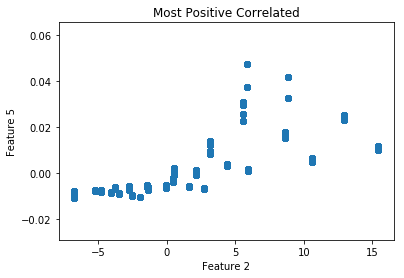

In [13]:
#most correlated
d = len(data[0])
n = len(data)    
one = np.array(np.ones(n))
one = one.transpose()
Z = data - np.matmul(one, np.matrix(mean))

Z2 = np.array(Z[:, 1])
Z5 = np.array(Z[:, 4])
plt.scatter(Z2, Z5)
plt.xlabel("Feature 2")
plt.ylabel("Feature 5")
plt.title("Most Positive Correlated")
plt.show()


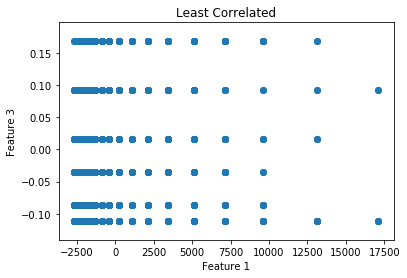

In [14]:
#least correlated
Z1 = np.array(Z[:, 0])
Z3 = np.array(Z[:, 2])
plt.scatter(Z1, Z3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 3")
plt.title("Least Correlated")
plt.show()

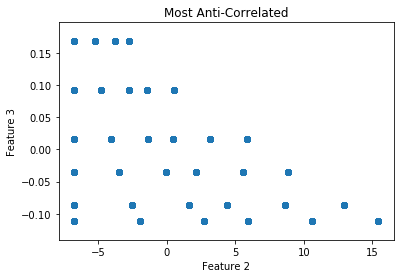

In [15]:
#negative correlated
Z2 = np.array(Z[:, 1])
Z3 = np.array(Z[:, 2])
plt.scatter(Z2, Z3)
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.title("Most Anti-Correlated")
plt.show()

In [16]:
def orth(x1, b, a):
    dot_ba = np.array(np.matmul(b.transpose(), a))
    dot_aa = np.array(np.matmul(a.transpose(), a))

    newB = b - (dot_ba[0][0] / dot_aa[0][0]) * a
    newB = np.array(newB)

    
    x1[:,1] = newB 
    return x1


In [26]:
def norm(x1, b, a):
    dot_bb = np.array(np.matmul(b.transpose(), b))
    dot_aa = np.array(np.matmul(a.transpose(), a))
    
    x1[:,1] = x1[:,1] * (dot_bb[0][0]**-.5)
    x1[:,0] = x1[:,0] * (dot_aa[0][0]**-.5)

    return x1


In [38]:
def powerIter(data, mean, epsilon):
    
    #covar matrix function
    sigma = covarInner(data, mean)
    
    #init x0 with random values
    d = len(data[0])
    x0 = [[0 for x in range(d)] for y in range(2)]
    for i in range(d):
        x0[0][i] = random.random()
        x0[1][i] = random.random()
    x0 = np.matrix(x0).transpose()
    x0 = norm(x0, x0[:,1], x0[:, 0])
    x0 = orth(x0, x0[:,1], x0[:, 0])

    
    x1 = np.matmul(sigma, x0)
    x1 = orth(x1, x1[:,1], x1[:, 0])
    x1 = norm(x1, x1[:,1], x1[:, 0])
    
    
    while(np.allclose(np.array(x0),np.array(x1),rtol=0, atol=epsilon) == False):
        x0 = x1
        x1 = np.matmul(sigma, x0)
        x1 = orth(x1, x1[:,1], x1[:, 0])
        x1 = norm(x1, x1[:,1], x1[:, 0])
        
    return x1



In [39]:
twoEig = powerIter(data, mean, epsilon)
print(twoEig)

[[ 9.99999285e-01 -5.58693682e-04]
 [-5.12043581e-04  3.73396379e-02]
 [-1.08587556e-07 -7.66225672e-05]
 [ 6.60273285e-04  9.95003883e-01]
 [-9.59838514e-07  1.72219049e-05]
 [-8.54980053e-04  9.25889084e-02]]


In [87]:
def projection(twoEig, data):
    n = len(data)
    firstEig = np.matrix(twoEig[:,0])
    secondEig = np.matrix(twoEig[:,1])
    x = []
    y = []
    
    for i in range(n):
        xi = np.matrix(data[i,:])
        firstproj = np.array(np.matmul(xi, firstEig))[0][0] / 1
        secondproj = np.array(np.matmul(xi, secondEig))[0][0] / 1
        x.append(firstproj)
        y.append(secondproj)

    return x, y

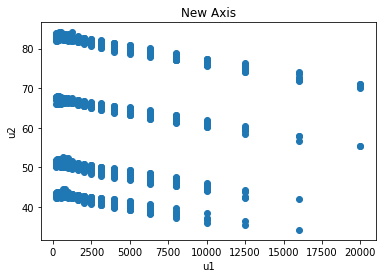

In [88]:
x, y = projection(twoEig, data)
plt.scatter(x, y)
plt.xlabel("u1")
plt.ylabel("u2")
plt.title("New Axis")
plt.show()